In [4]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
from math import sqrt, pi
import qiskit
qiskit.__qiskit_version__

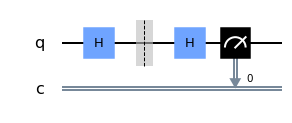

In [6]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.barrier()
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

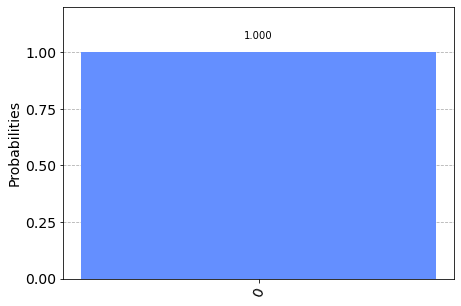

In [7]:
svs = Aer.get_backend('qasm_simulator')
job = execute(qc, svs)
plot_histogram(job.result().get_counts())

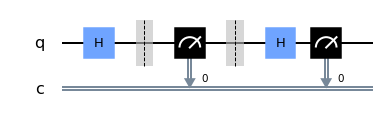

In [8]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.barrier()

qc.measure(0,0)
qc.barrier()

qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

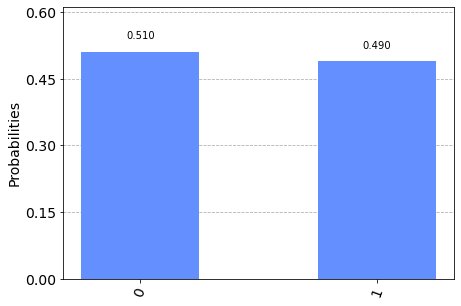

In [9]:
svs = Aer.get_backend('qasm_simulator')
job = execute(qc, svs)
plot_histogram(job.result().get_counts())

In [15]:
def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0:
            if bits[i] == 0:
                pass
            else:
                qc.x(0)
        else: 
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

In [16]:
def measure_message(message, bases):
    backend = Aer.get_backend('qasm_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0:
            message[q].measure(0,0)
        if bases[q] == 1:
            message[q].h(0)
            message[q].measure(0,0)
        result = execute(message[q], backend, shots=1, memory=True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [20]:
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            good_bits.append(bits[q])
    return good_bits

def sample_bits(bits, selection):
    sample = []
    for i in selection:
        i = np.mod(i, len(bits))
        sample.append(bits.pop(i))
    return sample

In [27]:
print('bit = %i' % alice_bits[0])
print('basis = %i' % alice_bases[0])
message[0].draw()

bit = 0
basis = 1


┌───┐ ░ ┌───┐┌─┐
q_0: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

bit = 0
basis = 0


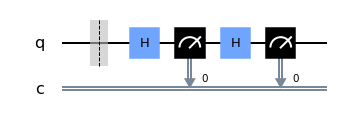

In [103]:
print('bit = %i' % alice_bits[4])
print('basis = %i' % alice_bases[4])
message[4].draw('mpl')

# Laboratory Three

# Quantum Key Distribution

## First, change the length of the bit sequence that is generated and observe the change in efficiency. The length is the variable n, set on the second line of code. Try values of 100, 200, 500 and 1000 and record the efficiency. How long of a sequence do you expect you will need to get close to 50% efficiency? Record your results in your laboratory report in the form of a table.

### For n = 100

alice_key = [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1]
bob_key = [1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
  bob_sample = [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]
alice_sample = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Eve's interference was detected.
key is compromized
Efficiency: 0.37
key length = 37


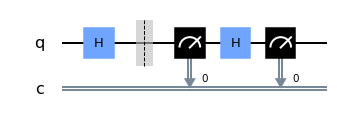

In [53]:
np.random.seed(seed=3)
n = 100

alice_bits = randint(2, size=n)
#print("alice_bits = " + str(alice_bits))

alice_bases = randint(2, size=n)
#print("alice_bases = " + str(alice_bases))
message = encode_message(alice_bits, alice_bases)

eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
#print("intercepted_message = " + str(intercepted_message))

bob_bases = randint(2, size=n)
#print("bob_bases = " + str(bob_bases))
bob_results = measure_message(message, bob_bases)
#print("bob_results = " + str(bob_results))
     
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
#print("alice_key = " + str(alice_key))
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
#print("bob_key = " + str(bob_key))
     
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
print("alice_key = " + str(alice_key))
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
print("bob_key = " + str(bob_key))

sample_size = 15

bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

if bob_sample != alice_sample:
    print("Eve's interference was detected.")
else:
    print("Eve went undetected!")

if bob_sample == alice_sample:
    print("key is safe")
else:
    print("key is compromized")
print("Efficiency: "+str(len(bob_key)/n))

print("key length = %i" % len(alice_key))
message[0].draw('mpl')

### For n = 500

  bob_sample = [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1]
alice_sample = [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
Eve's interference was detected.
key is compromized
Efficiency: 0.46
key length = 230


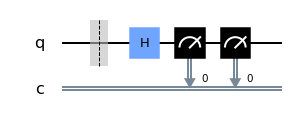

In [52]:
np.random.seed(seed=3)
n = 500

alice_bits = randint(2, size=n)
#print("alice_bits = " + str(alice_bits))

alice_bases = randint(2, size=n)
#print("alice_bases = " + str(alice_bases))
message = encode_message(alice_bits, alice_bases)

eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
#print("intercepted_message = " + str(intercepted_message))

bob_bases = randint(2, size=n)
#print("bob_bases = " + str(bob_bases))
bob_results = measure_message(message, bob_bases)
#print("bob_results = " + str(bob_results))
     
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
#print("alice_key = " + str(alice_key))
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
#print("bob_key = " + str(bob_key))

sample_size = 15

bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

if bob_sample != alice_sample:
    print("Eve's interference was detected.")
else:
    print("Eve went undetected!")

if bob_sample == alice_sample:
    print("key is safe")
else:
    print("key is compromized")
print("Efficiency: "+str(len(bob_key)/n))

print("key length = %i" % len(alice_key))
message[0].draw('mpl')

### For n = 1000

  bob_sample = [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1]
alice_sample = [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]
Eve's interference was detected.
key is compromized
Efficiency: 0.485
key length = 485


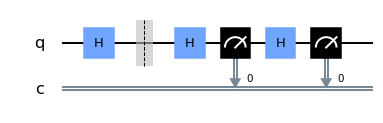

In [64]:
np.random.seed(seed=3)
n = 1000

alice_bits = randint(2, size=n)
#print("alice_bits = " + str(alice_bits))

alice_bases = randint(2, size=n)
#print("alice_bases = " + str(alice_bases))
message = encode_message(alice_bits, alice_bases)

eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
#print("intercepted_message = " + str(intercepted_message))

bob_bases = randint(2, size=n)
#print("bob_bases = " + str(bob_bases))
bob_results = measure_message(message, bob_bases)
#print("bob_results = " + str(bob_results))
     
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
#print("alice_key = " + str(alice_key))
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
#print("bob_key = " + str(bob_key))

sample_size = 15

bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

if bob_sample != alice_sample:
    print("Eve's interference was detected.")
else:
    print("Eve went undetected!")

if bob_sample == alice_sample:
    print("key is safe")
else:
    print("key is compromized")
print("Efficiency: "+str(len(bob_key)/n))

print("key length = %i" % len(alice_key))
message[0].draw('mpl')

### For n = 1200

  bob_sample = [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
alice_sample = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]
Eve's interference was detected.
key is compromized
Efficiency: 0.4928571428571429
key length = 690


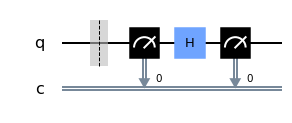

In [66]:
np.random.seed(seed=3)
n = 1400

alice_bits = randint(2, size=n)
#print("alice_bits = " + str(alice_bits))

alice_bases = randint(2, size=n)
#print("alice_bases = " + str(alice_bases))
message = encode_message(alice_bits, alice_bases)

eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
#print("intercepted_message = " + str(intercepted_message))

bob_bases = randint(2, size=n)
#print("bob_bases = " + str(bob_bases))
bob_results = measure_message(message, bob_bases)
#print("bob_results = " + str(bob_results))
     
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
#print("alice_key = " + str(alice_key))
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
#print("bob_key = " + str(bob_key))

sample_size = 15

bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

if bob_sample != alice_sample:
    print("Eve's interference was detected.")
else:
    print("Eve went undetected!")

if bob_sample == alice_sample:
    print("key is safe")
else:
    print("key is compromized")
print("Efficiency: "+str(len(bob_key)/n))

print("key length = %i" % len(alice_key))
message[0].draw('mpl')

## Second, in the video lecture we observed that when the message was intercepted there was only a small number of bits that were different in the sample. Change the seed of the random number on the first line of code and observe how the number of different bits in the sample changes. Try five different seed values and record the number of different bits. Record your results in your laboratory report in the form of a table.

### For seed = 0

In [69]:
np.random.seed(seed=0)
n = 100

alice_bits = randint(2, size=n)
#print("alice_bits = " + str(alice_bits))

alice_bases = randint(2, size=n)
#print("alice_bases = " + str(alice_bases))
message = encode_message(alice_bits, alice_bases)

eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
#print("intercepted_message = " + str(intercepted_message))

bob_bases = randint(2, size=n)
#print("bob_bases = " + str(bob_bases))
bob_results = measure_message(message, bob_bases)
#print("bob_results = " + str(bob_results))
     
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
#print("alice_key = " + str(alice_key))
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
#print("bob_key = " + str(bob_key))

sample_size = 15

bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
alice_sample = [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1]


### For seed = 1

In [70]:
np.random.seed(seed=1)
n = 100

alice_bits = randint(2, size=n)
#print("alice_bits = " + str(alice_bits))

alice_bases = randint(2, size=n)
#print("alice_bases = " + str(alice_bases))
message = encode_message(alice_bits, alice_bases)

eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
#print("intercepted_message = " + str(intercepted_message))

bob_bases = randint(2, size=n)
#print("bob_bases = " + str(bob_bases))
bob_results = measure_message(message, bob_bases)
#print("bob_results = " + str(bob_results))
     
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
#print("alice_key = " + str(alice_key))
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
#print("bob_key = " + str(bob_key))

sample_size = 15

bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1]
alice_sample = [0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0]


### For seed = 2

In [71]:
np.random.seed(seed=2)
n = 100

alice_bits = randint(2, size=n)
#print("alice_bits = " + str(alice_bits))

alice_bases = randint(2, size=n)
#print("alice_bases = " + str(alice_bases))
message = encode_message(alice_bits, alice_bases)

eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
#print("intercepted_message = " + str(intercepted_message))

bob_bases = randint(2, size=n)
#print("bob_bases = " + str(bob_bases))
bob_results = measure_message(message, bob_bases)
#print("bob_results = " + str(bob_results))
     
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
#print("alice_key = " + str(alice_key))
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
#print("bob_key = " + str(bob_key))

sample_size = 15

bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0]
alice_sample = [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]


### For seed = 4

In [72]:
np.random.seed(seed=4)
n = 100

alice_bits = randint(2, size=n)
#print("alice_bits = " + str(alice_bits))

alice_bases = randint(2, size=n)
#print("alice_bases = " + str(alice_bases))
message = encode_message(alice_bits, alice_bases)

eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
#print("intercepted_message = " + str(intercepted_message))

bob_bases = randint(2, size=n)
#print("bob_bases = " + str(bob_bases))
bob_results = measure_message(message, bob_bases)
#print("bob_results = " + str(bob_results))
     
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
#print("alice_key = " + str(alice_key))
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
#print("bob_key = " + str(bob_key))

sample_size = 15

bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]
alice_sample = [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1]


### For seed = 5

In [73]:
np.random.seed(seed=5)
n = 100

alice_bits = randint(2, size=n)
#print("alice_bits = " + str(alice_bits))

alice_bases = randint(2, size=n)
#print("alice_bases = " + str(alice_bases))
message = encode_message(alice_bits, alice_bases)

eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
#print("intercepted_message = " + str(intercepted_message))

bob_bases = randint(2, size=n)
#print("bob_bases = " + str(bob_bases))
bob_results = measure_message(message, bob_bases)
#print("bob_results = " + str(bob_results))
     
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
#print("alice_key = " + str(alice_key))
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
#print("bob_key = " + str(bob_key))

sample_size = 15

bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1]
alice_sample = [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0]


# Balanced Functions

HTMLMath(value='$$ |00\\rangle = |00\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x05\x00\x00\x00\xcc\x08\x06\x00\x00\x00z\x06\xb6…

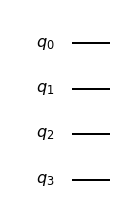

In [96]:
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.widgets import dj_widget

dj_widget(size="small", case="balanced")

n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)
const_oracle.draw('mpl')

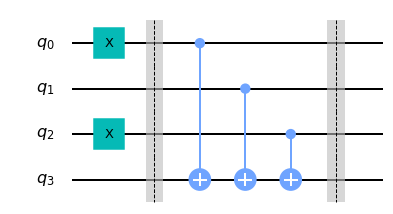

In [97]:
#PART NEEDED
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.barrier()




for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw('mpl')

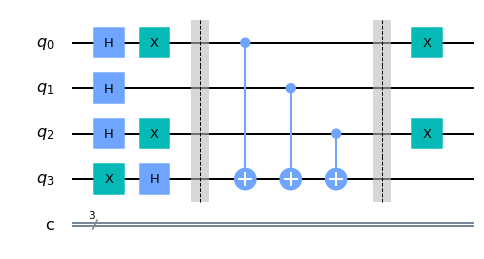

In [105]:
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
        
balanced_oracle.draw('mpl')

dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle
dj_circuit.draw('mpl')

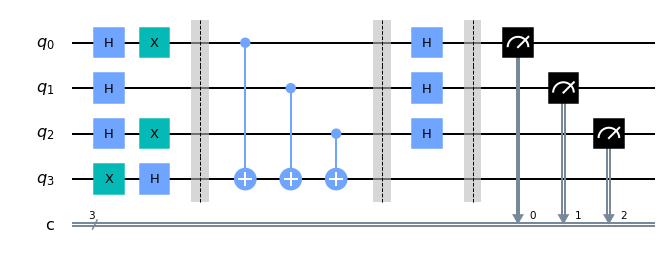

In [98]:
#PART NEEDED
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')

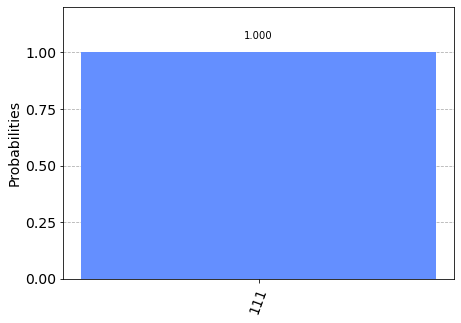

In [81]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1
results = execute(dj_circuit, backend=backend, shots=shots, memory=True).result()
answer = results.get_counts()

plot_histogram(answer)

### Deutsch-Josza ORACLE

In [82]:
def dj_oracle(case, n):

    oracle_qc = QuantumCircuit(n+1)
    

    if case == "balanced":

        b = np.random.randint(1,2**n)

        b_str = format(b, '0'+str(n)+'b')

        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

        for qubit in range(n):
            oracle_qc.cx(qubit, n)

        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    if case == "constant":

        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" 
    return oracle_gate

### Deutsch-Josza ALGORITHM

In [83]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    dj_circuit.x(n)
    dj_circuit.h(n)

    for qubit in range(n):
        dj_circuit.h(qubit)

    dj_circuit.append(oracle, range(n+1))

    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

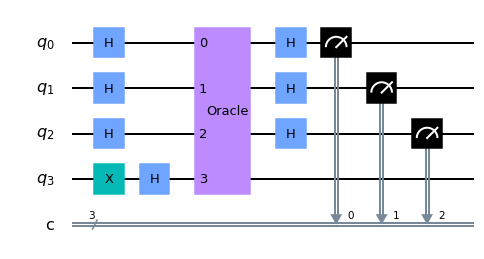

In [99]:
n = 3
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')

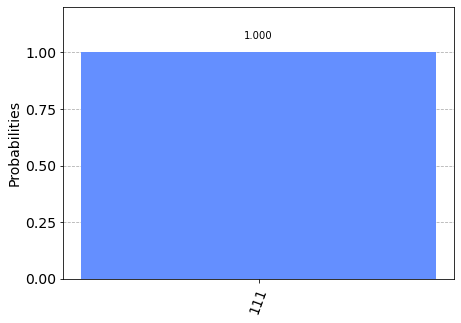

In [100]:
backend = BasicAer.get_backend('qasm_simulator')
results = execute(dj_circuit, backend=backend, shots=1, memory=True).result()
answer = results.get_counts()
plot_histogram(answer)